File: Airbnb-Housing-SF_DataPrep_EDA.ipynb  
Names: Corinne Medeiros  
Date: 1/10/21    
Usage: Program imports, cleans, and organizes data, then generates exploratory charts.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

## San Francisco Airbnb and Housing Market Trends

### Loading Airbnb Listings Data

These data come from <http://insideairbnb.com/get-the-data.html>. To look at listings over time, I downloaded their archival data from each December. In total, I have 6 years of listings data from 2015 to 2020. Before loading it into this project, I merged these 6 separate datasets using Tableau Prep Builder into a combined csv file.

#### Tableau Prep Builder Flow:

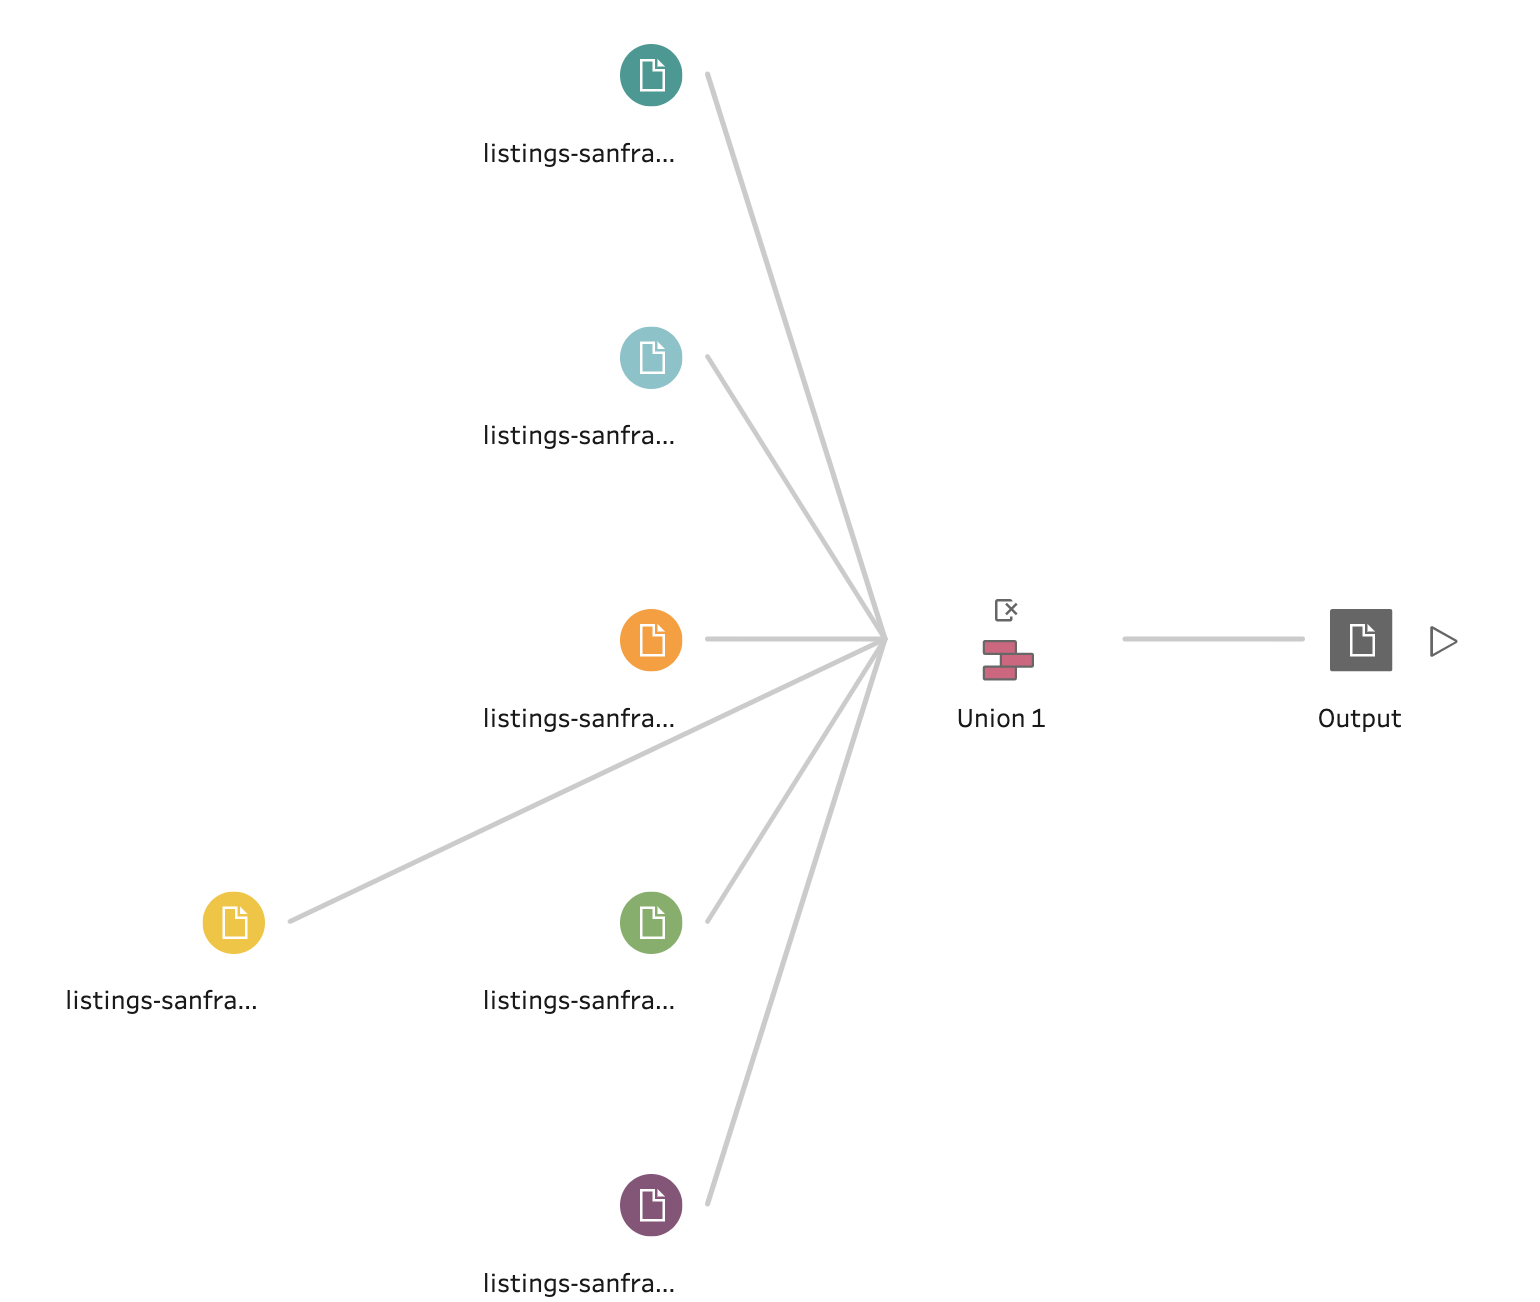

In [2]:
# Loading merged Airbnb listings data
sf_airbnb_df = pd.read_csv('listings-sf_2015-2020.csv', encoding = "ISO-8859-1", engine='python')

# Previewing data
sf_airbnb_df.head()

,Table Names,id,name,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,listings-sanfrancisco-2015.csv,4720512,Private Room in Guest House #105,202591,Jeffrey,Western Addition,Private room,80,22,1.97,5,243
1,listings-sanfrancisco-2015.csv,1214348,Hayes Valley Gem - Center of SF!,6608684,Dan,Western Addition,Entire home/apt,950,4,0.14,1,179
2,listings-sanfrancisco-2015.csv,8193992,Lower Pacific Heights Gem,7745422,NaN,Western Addition,Private room,350,0,NaN,1,64
3,listings-sanfrancisco-2015.csv,9668595,Simple Studio in the Center of SF,49963870,Elvi,Western Addition,Entire home/apt,99,0,NaN,1,2
4,listings-sanfrancisco-2015.csv,8521718,Amazing Attic Room in NOPA Duplex,30081902,Ben,Western Addition,Private room,175,1,0.51,1,45


In [3]:
# Changing 'Table Names' column name
sf_airbnb_df.rename(columns={"Table Names": "Original File"}, inplace=True)

# Previewing data
sf_airbnb_df.head()

,Original File,id,name,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,listings-sanfrancisco-2015.csv,4720512,Private Room in Guest House #105,202591,Jeffrey,Western Addition,Private room,80,22,1.97,5,243
1,listings-sanfrancisco-2015.csv,1214348,Hayes Valley Gem - Center of SF!,6608684,Dan,Western Addition,Entire home/apt,950,4,0.14,1,179
2,listings-sanfrancisco-2015.csv,8193992,Lower Pacific Heights Gem,7745422,NaN,Western Addition,Private room,350,0,NaN,1,64
3,listings-sanfrancisco-2015.csv,9668595,Simple Studio in the Center of SF,49963870,Elvi,Western Addition,Entire home/apt,99,0,NaN,1,2
4,listings-sanfrancisco-2015.csv,8521718,Amazing Attic Room in NOPA Duplex,30081902,Ben,Western Addition,Private room,175,1,0.51,1,45


In order to find the number of listings per year, I'm going to group by the original file names and calculate the unique values within the 'id' column.

In [4]:
# Finding number of unique listings per year
num_listings_per_yr = sf_airbnb_df.groupby('Original File')['id'].nunique()

In [5]:
print(num_listings_per_yr)

Original File
listings-sanfrancisco-2015.csv    7165
listings-sanfrancisco-2016.csv    9066
listings-sanfrancisco-2017.csv    6650
listings-sanfrancisco-2018.csv    7072
listings-sanfrancisco-2019.csv    8533
listings-sanfrancisco-2020.csv    7087
Name: id, dtype: int64


In [6]:
type(num_listings_per_yr)

pandas.core.series.Series

In [7]:
num_listings_per_yr_df = pd.DataFrame(data=num_listings_per_yr)

num_listings_per_yr_df

,id
Original File,
listings-sanfrancisco-2015.csv,7165
listings-sanfrancisco-2016.csv,9066
listings-sanfrancisco-2017.csv,6650
listings-sanfrancisco-2018.csv,7072
listings-sanfrancisco-2019.csv,8533
listings-sanfrancisco-2020.csv,7087


In [8]:
# Saving listings as list
listings_list = (num_listings_per_yr_df.iloc[:, 0]).tolist()

# Restructuring data into new dataframe
d = {'Year': [2015, 2016, 2017, 2018, 2019, 2020], 'Total Listings': listings_list}
total_listings_df = pd.DataFrame(data=d)

total_listings_df

,Year,Total Listings
0,2015,7165
1,2016,9066
2,2017,6650
3,2018,7072
4,2019,8533
5,2020,7087


### Loading Housing Data

#### Home Values

The original source of these data is <https://www.zillow.com/research/data/>. Since I'm only focusing on the city of San Francisco, I removed the rest of the rows in Excel and added a header column up front before loading it into this project.

In [9]:
# Loading modified housing data
sf_housing_df = pd.read_csv('zillow-sf.csv', header=None, index_col=0)

# Previewing data
sf_housing_df.head()

,1,2,3,4,5,6,7,8,9,10,...,290,291,292,293,294,295,296,297,298,299
0,,,,,,,,,,,,,,,,,,,,,
Date,1/31/96,2/29/96,3/31/96,4/30/96,5/31/96,6/30/96,7/31/96,8/31/96,9/30/96,10/31/96,...,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20
Home Value,293098,292149,291505,290377,289565,289195,288911,289376,290090,291385,...,1419613,1418077,1418947,1412362,1404550,1396250,1395524,1397313,1391421,1385625


In [10]:
# Transposing dataframe to switch rows to columns
sf_housing_df_t = sf_housing_df.T

# Previewing data
sf_housing_df_t.head()

,Date,Home Value
1,1/31/96,293098
2,2/29/96,292149
3,3/31/96,291505
4,4/30/96,290377
5,5/31/96,289565


In [11]:
# Checking dataframe summary
sf_housing_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 2 columns):
Date          299 non-null object
Home Value    299 non-null object
dtypes: object(2)
memory usage: 17.0+ KB


In [12]:
# Changing dates to datetime format
sf_housing_df_t['Date'] = pd.to_datetime(sf_housing_df_t['Date'])

# Previewing data
sf_housing_df_t.head()

,Date,Home Value
1,1996-01-31,293098
2,1996-02-29,292149
3,1996-03-31,291505
4,1996-04-30,290377
5,1996-05-31,289565


In [13]:
# Changing Home Value to numeric format
sf_housing_df_t['Home Value'] = pd.to_numeric(sf_housing_df_t['Home Value'])

# Previewing data
sf_housing_df_t.head()

,Date,Home Value
1,1996-01-31,293098
2,1996-02-29,292149
3,1996-03-31,291505
4,1996-04-30,290377
5,1996-05-31,289565


In [14]:
# Checking dataframe summary
sf_housing_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 2 columns):
Date          299 non-null datetime64[ns]
Home Value    299 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.0 KB


In [15]:
# Setting Date as index
sf_housing_df_t = sf_housing_df_t.set_index('Date')

# Previewing data
sf_housing_df_t.head()

,Home Value
Date,
1996-01-31,293098
1996-02-29,292149
1996-03-31,291505
1996-04-30,290377
1996-05-31,289565


### Loading Housing Data

#### Rental Prices

The original source of these data is <https://www.zillow.com/research/data/>. Since I'm only focusing on the city of San Francisco, I removed the rest of the rows in Excel and added a header column up front before loading it into this project.

In [16]:
# Loading modified housing data
sf_rentals_df = pd.read_csv('zillow-sf-rent.csv', header=None, index_col=0)

# Previewing data
sf_rentals_df.head()

,1,2,3,4,5,6,7,8,9,10,...,62,63,64,65,66,67,68,69,70,71
0,,,,,,,,,,,,,,,,,,,,,
Date,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Rent Price,2636,2664,2692,2720,2744,2768,2791,2812,2832,2852,...,3220,3203,3187,3169,3151,3133,3114,3094,3075,3054


In [17]:
# Transposing dataframe to switch rows to columns
sf_rentals_df_t = sf_rentals_df.T

# Previewing data
sf_rentals_df_t.head()

,Date,Rent Price
1,2015-01,2636
2,2015-02,2664
3,2015-03,2692
4,2015-04,2720
5,2015-05,2744


In [18]:
# Changing dates to datetime format
sf_rentals_df_t['Date'] = pd.to_datetime(sf_rentals_df_t['Date'])

# Previewing data
sf_rentals_df_t.head()

,Date,Rent Price
1,2015-01-01,2636
2,2015-02-01,2664
3,2015-03-01,2692
4,2015-04-01,2720
5,2015-05-01,2744


In [19]:
# Changing Rent Price to numeric format
sf_rentals_df_t['Rent Price'] = pd.to_numeric(sf_rentals_df_t['Rent Price'])

# Previewing data
sf_rentals_df_t.head()

,Date,Rent Price
1,2015-01-01,2636
2,2015-02-01,2664
3,2015-03-01,2692
4,2015-04-01,2720
5,2015-05-01,2744


In [20]:
# Checking dataframe summary
sf_rentals_df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1 to 71
Data columns (total 2 columns):
Date          71 non-null datetime64[ns]
Rent Price    71 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [21]:
# Setting Date as index
sf_rentals_df_t = sf_rentals_df_t.set_index('Date')

# Previewing data
sf_rentals_df_t.head()

,Rent Price
Date,
2015-01-01,2636
2015-02-01,2664
2015-03-01,2692
2015-04-01,2720
2015-05-01,2744


### Data Visualization

After loading and cleaning, I have 4 dataframes to work with for visualizations:  

**sf_airbnb_df  
total_listings_df  
sf_housing_df_t  
sf_rentals_df_t**

In [22]:
# Writing cleaned data to csv files
sf_airbnb_df.to_csv('sf_airbnb_df.csv')
total_listings_df.to_csv('total_listings_df.csv')
sf_housing_df_t.to_csv('sf_housing_df_t.csv')
sf_rentals_df_t.to_csv('sf_rentals_df_t.csv')

### Line Chart - Airbnb listings

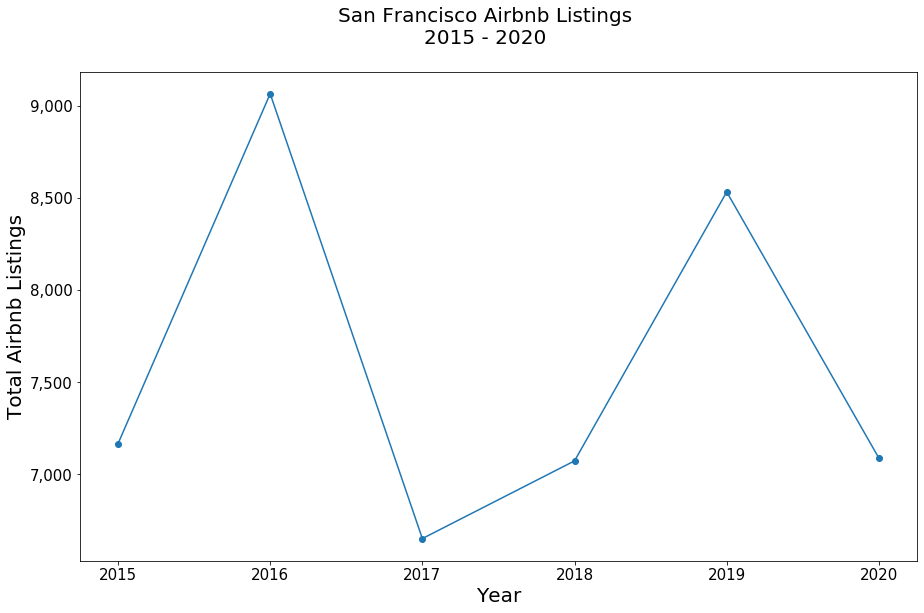

In [23]:
# Creating figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.plot(total_listings_df['Year'], total_listings_df['Total Listings'], marker='o',)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Total Airbnb Listings', fontsize=20)
plt.yticks(fontsize=15)
plt.suptitle('San Francisco Airbnb Listings\n2015 - 2020', fontsize=20)

plt.savefig('airbnb-linechart.png')

plt.show()

### Bar Chart - Airbnb listings

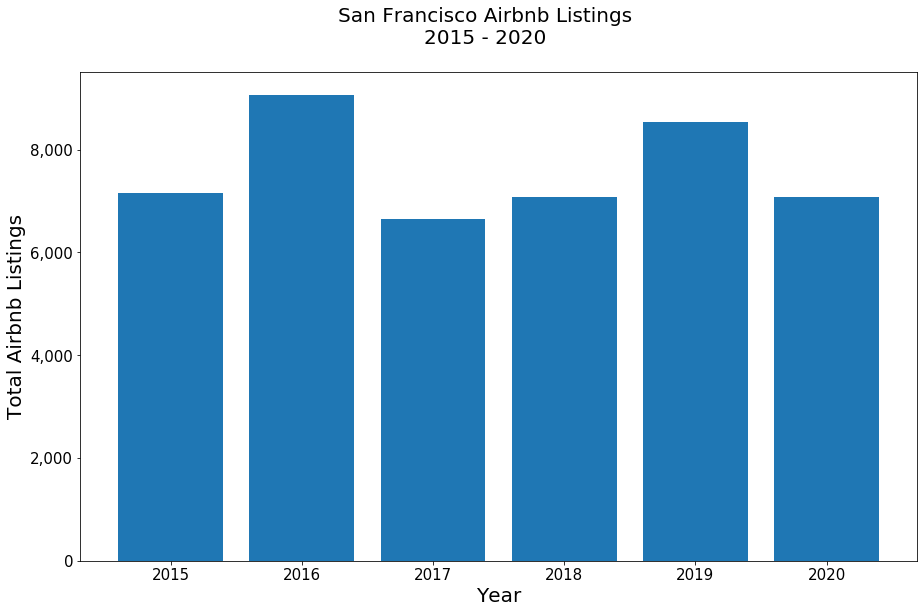

In [24]:
# Creating figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

ax.bar(total_listings_df['Year'], total_listings_df['Total Listings'])
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Total Airbnb Listings', fontsize=20)
plt.yticks(fontsize=15)
plt.suptitle('San Francisco Airbnb Listings\n2015 - 2020', fontsize=20)

plt.savefig('airbnb-barchart.png')

plt.show()

### Line Chart - Home Values

In [25]:
# Filtering housing data to 2015 - 2020

housing_df_subset = sf_housing_df_t.loc['2015-12-01':'2020-12-31']

housing_df_subset.head()

,Home Value
Date,
2015-12-31,1193367
2016-01-31,1208674
2016-02-29,1215580
2016-03-31,1212365
2016-04-30,1198282


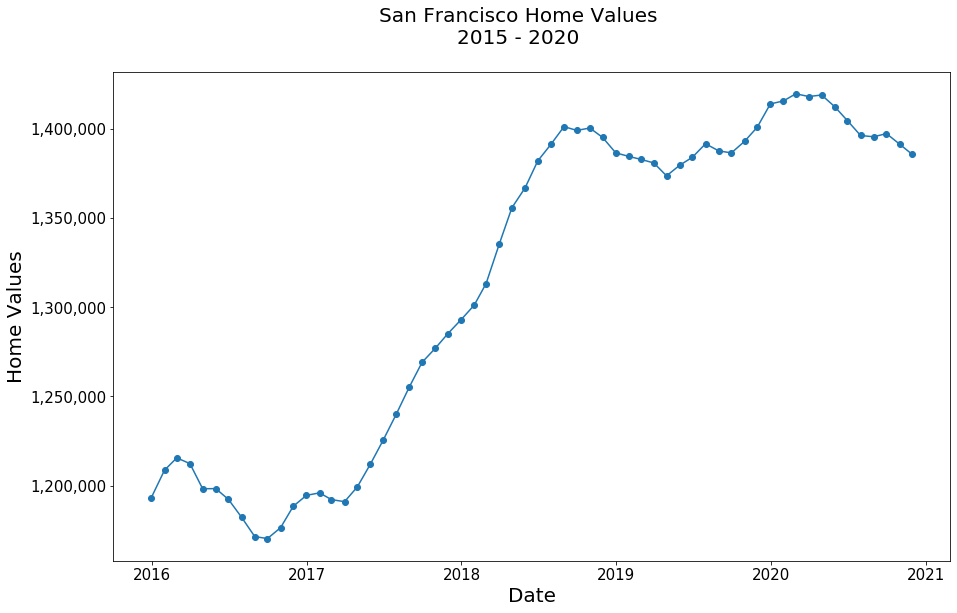

In [31]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Creating figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

plt.plot(housing_df_subset.index, housing_df_subset['Home Value'], marker='o',)

# Adding commas to y-axis
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Home Values', fontsize=20)
plt.yticks(fontsize=15)
plt.suptitle('San Francisco Home Values\n2015 - 2020', fontsize=20)

plt.savefig('homes-linechart.png')

plt.show()

### Line Chart - Rental Prices

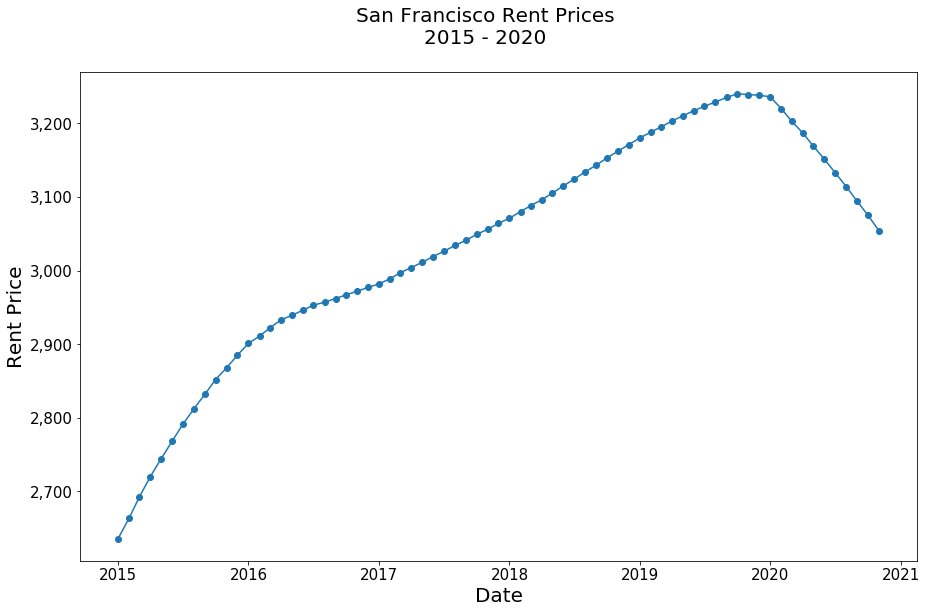

In [33]:
# Creating figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

plt.plot(sf_rentals_df_t.index, sf_rentals_df_t['Rent Price'], marker='o',)

# Adding commas to y-axis
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Rent Price', fontsize=20)
plt.yticks(fontsize=15)
plt.suptitle('San Francisco Rent Prices\n2015 - 2020', fontsize=20)

plt.savefig('rentals-linechart.png')

plt.show()

Now that I've explored and organized my data, I'll use Tableau to generate some nicer looking graphs.